## Python statistics essential training - Personal Email Analytics

In [1]:
# Standard imports
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

## Objective

Clean and visualize email data to analyze mail behavior.

For gmail users, it is easy to retireve messages at [takeout.google.com]
(https://takeout.google.com/settings/takeout)

An anonymized dataset is used for this exercise.

In [10]:
### Converting mailbox data
mbox = mailbox.mbox('Sent.mbox')

The resulting object is array-like, with one entry per message. Each entry is dictionary like, with keys corresponding to metadata and data for each message.

In [4]:
mbox[0].keys()

['User-Agent',
 'Date',
 'Subject',
 'From',
 'To',
 'CC',
 'Message-ID',
 'Thread-Topic',
 'References',
 'In-Reply-To',
 'Content-Type',
 'Content-Transfer-Encoding',
 'MIME-Version']

The easiest way to get these data into Pandas is to build a CSV file from them. We use the module `csv` to write out the CSV file as we loop over the mailbox object. We save only subject, from, to, and date, and we write a simple header at the top with the names of columns.

In [ ]:
with open('mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['subject','from','to','date'])
    
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['to'], message['date']])

All done! Thanks to Justin Ellis for inspiration with https://jellis18.github.io/post/2018-01-17-mail-analysis.

## Moving on!

In [14]:
# The csv file has anonymized subjects
# It's also been simplified by only keeping the first recipient of each email
messages = pd.read_csv('mbox-anonymized.csv')

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
subject    1030 non-null object
from       1029 non-null object
to         1030 non-null object
date       1030 non-null object
dtypes: object(4)
memory usage: 32.3+ KB


In [13]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [15]:
# Email addresses use a few different formats, we should normalize them
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [16]:
re.search('<(.+)>', messages['from'][0])

<re.Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [19]:
# group 0 matches entire string
re.search('<(.+)>', messages['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [20]:
# group 1 matches the part in parenthesis
re.search('<(.+)>', messages['from'][0]).group(1)

'Michele.Vallisneri@jpl.nasa.gov'

In [21]:
def clean_address(raw):
    match = re.search('<(.+)>', raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [22]:
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [23]:
messages['from'] = messages['from'].apply(clean_address)

TypeError: expected string or bytes-like object

In [24]:
# Drop into debuf mode
%debug

> /usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/re.py(183)search()
    181     """Scan through string looking for a match to the pattern, returning
    182     a Match object, or None if no match was found."""
--> 183     return _compile(pattern, flags).search(string)
    184 
    185 def sub(pattern, repl, string, count=0, flags=0):

ipdb> up
> <ipython-input-21-934bd7fa4389>(2)clean_address()
      1 def clean_address(raw):
----> 2     match = re.search('<(.+)>', raw)
      3 
      4     if match is None:
      5         return raw

ipdb> print(raw)
nan
ipdb> quit


In [25]:
messages['from'] = messages['from'].dropna().apply(clean_address)
messages['to'] = messages['to'].dropna().apply(clean_address)

In [26]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [27]:
type(messages['date'][0])

str

In [32]:
# Turn date strings into datetime objects
pd.to_datetime(messages['date'][0]).tz_localize('UTC').tz_convert('America/Menominee')



Timestamp('2017-11-27 16:18:46-0600', tz='America/Menominee')

In [33]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_localize('UTC').tz_convert('America/Menominee'))

In [34]:
messages.date.head()

0   2017-11-27 16:18:46-06:00
1   2018-03-26 20:38:16-05:00
2   2018-02-13 16:54:50-06:00
3   2018-01-26 13:40:04-06:00
4   2017-10-30 19:13:00-05:00
Name: date, dtype: datetime64[ns, America/Menominee]

In [35]:
messages.date.min(), messages.date.max()

(Timestamp('2017-07-01 01:26:52-0500', tz='America/Menominee'),
 Timestamp('2018-05-13 10:40:20-0500', tz='America/Menominee'))

In [36]:
# Break apart datetime objects in various ways for plotting
messages.date.dt.weekday_name.head()

0     Monday
1     Monday
2    Tuesday
3     Friday
4     Monday
Name: date, dtype: object

In [39]:
messages['dayofweek'] = pd.Categorical(messages['date'].dt.weekday_name,
                                      ordered=True,
                                      categories=['Monday', 'Tuesday', 
                                                  'Wednesday', 'Thursday',
                                                  'Friday', 'Saturday', 'Sunday'])

In [40]:
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60

In [42]:
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365/25

In [43]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 16:18:46-06:00,Monday,16.300000,2017.906303
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-26 20:38:16-05:00,Monday,20.633333,2018.232812
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,2018-02-13 16:54:50-06:00,Tuesday,16.900000,2018.120543
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,2018-01-26 13:40:04-06:00,Friday,13.666667,2018.071247
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,2017-10-30 19:13:00-05:00,Monday,19.216667,2017.829657


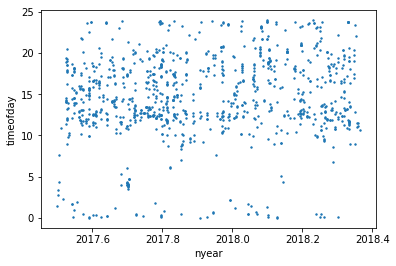

In [44]:
messages.plot.scatter('nyear', 'timeofday', s=2)

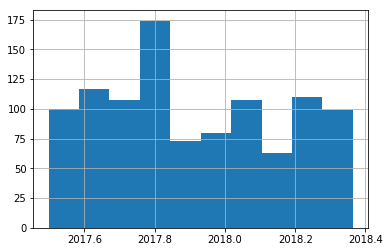

In [45]:
messages.nyear.hist()

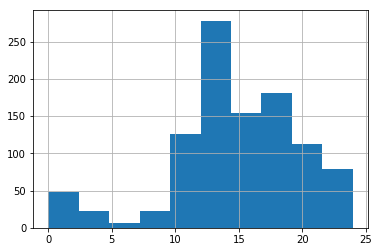

In [46]:
messages.timeofday.hist()

In [47]:
messages.dayofweek.value_counts()

Tuesday      221
Monday       219
Wednesday    216
Thursday     165
Friday       148
Saturday      34
Sunday        27
Name: dayofweek, dtype: int64

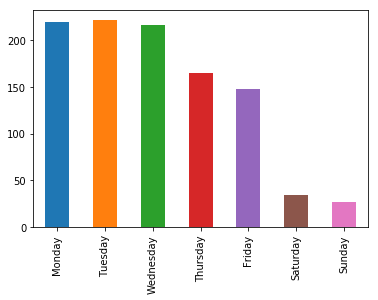

In [49]:
counts = messages.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')